In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import vame

import my_paths as mp
from src import dlc2vame as d2v

Using CUDA
GPU active: True
GPU used: NVIDIA GeForce GTX 1070


In [9]:
data_stems = d2v._read_config()["video_sets"]

In [6]:
exclude = ["0-23-20230913124825", "0-05-20230913120740", "0-15-20230913124156",
           "0-21-20230913124721", "0-22-20230913124744", "0-17-20230913124341",
           "0-20-20230913124653"]

_ = d2v.add_data_to_vame(
    df_source=mp.data_path / "batch_001",
    vid_source=Path.home() / "motion" / "pilot_videos",
    vame_path=mp.vame_path,
    exclude=exclude
)

# comon_dict

found 13 filtered pose .h5 files at /home/mateo/code/beehaviour/data/batch_001
found 13 mp4 files at /home/mateo/motion/pilot_videos
every video has a corresponding pose estimation. Great!
0-17-20230913124341.h5 excluded, skipping
0-02-20230913121608.h5 already transferred, skipping
0-14-20230913123906.h5 already transferred, skipping
0-05-20230913120740.h5 excluded, skipping
0-20-20230913124653.h5 excluded, skipping
0-21-20230913124721.h5 excluded, skipping
0-15-20230913124156.h5 excluded, skipping
0-13-20230913123820.h5 already transferred, skipping
0-02-20230913122407.h5 already transferred, skipping
0-22-20230913124744.h5 excluded, skipping
0-23-20230913124825.h5 excluded, skipping
0-12-20230913123759.h5 already transferred, skipping
0-19-20230913124517.h5 already transferred, skipping

No new data to add
no parts to drop from 0-02-20230913122407 df, skipping
no parts to drop from 0-19-20230913124517 df, skipping
no parts to drop from 0-14-20230913123906 df, skipping
no parts to dr

In [7]:
# initializes the VAME project. making sure the folder can coexists with those of the deeplabcut models
# aleterative make a helper function to create symlinks posthoc
# this will break if the date changes do not rerun once 

# config = vame.init_new_project(
#     project='Your-VAME-Project', 
#     videos=[video_paths],
#     working_directory=data_path,
#     videotype='.mp4'
# )


In [18]:
_ = vame.egocentric_alignment(
    mp.vame_path/"config.yaml", 
    pose_ref_index=[4,8], 
    crop_size=(720,720), 
    video_format='.mp4',
    use_video=True,
    check_video=True
)

Aligning data 0-02-20230913122407, Pose confidence value: 0.99
Background image in cache, loading...
Aligning data 0-19-20230913124517, Pose confidence value: 0.99
Background image in cache, loading...
Aligning data 0-14-20230913123906, Pose confidence value: 0.99
Background image in cache, loading...
Aligning data 0-02-20230913121608, Pose confidence value: 0.99
Background image in cache, loading...
Aligning data 0-13-20230913123820, Pose confidence value: 0.99
Background image in cache, loading...
Aligning data 0-12-20230913123759, Pose confidence value: 0.99
Background image in cache, loading...
Your data is now in the right format and you can call vame.create_trainset()


In [20]:
vame.create_trainset(mp.vame_path/"config.yaml", check_parameter=False)

Creating training dataset...
Using robust setting to eliminate outliers! IQR factor: 4
Creating trainset from the vame.egocentrical_alignment() output 
z-scoring of file 0-02-20230913122407
IQR value: 1.60, IQR cutoff: 6.42
z-scoring of file 0-19-20230913124517
IQR value: 1.35, IQR cutoff: 5.41
z-scoring of file 0-14-20230913123906
IQR value: 1.43, IQR cutoff: 5.74
z-scoring of file 0-02-20230913121608
IQR value: 1.44, IQR cutoff: 5.77
z-scoring of file 0-13-20230913123820
IQR value: 1.75, IQR cutoff: 7.00
z-scoring of file 0-12-20230913123759
IQR value: 1.66, IQR cutoff: 6.64
Lenght of train data: 636
Lenght of test data: 424
A training and test set has been created. Next step: vame.train_model()


In [16]:
vame.train_model(mp.vame_path/"config.yaml")

Train Variational Autoencoder - model name: VAME 

Using CUDA
GPU active: True
GPU used:  NVIDIA GeForce GTX 1070
Latent Dimensions: 30, Time window: 10, Batch Size: 22, Beta: 1, lr: 0.0005

Initialize train data. Datapoints 636
Initialize test data. Datapoints 424
Scheduler step size: 100, Scheduler gamma: 0.20

Start training... 
Epoch: 1
Train loss: 2734.856, MSE-Loss: 1336.528, MSE-Future-Loss 1398.328, KL-Loss: 0.000, Kmeans-Loss: 0.000, weight: 0.00
Test loss: 193.165, MSE-Loss: 193.165, KL-Loss: 0.000, Kmeans-Loss: 0.000


Epoch: 2
Train loss: 931.954, MSE-Loss: 441.918, MSE-Future-Loss 490.037, KL-Loss: 0.000, Kmeans-Loss: 0.000, weight: 0.00
Test loss: 108.697, MSE-Loss: 108.697, KL-Loss: 0.000, Kmeans-Loss: 0.000


Epoch: 3
Train loss: 437.542, MSE-Loss: 183.859, MSE-Future-Loss 252.599, KL-Loss: 0.613, Kmeans-Loss: 0.471, weight: 0.25
Test loss: 76.779, MSE-Loss: 75.840, KL-Loss: 0.633, Kmeans-Loss: 0.305


Epoch: 4
Train loss: 396.197, MSE-Loss: 164.117, MSE-Future-Loss 229

Using CUDA
GPU active: True
GPU used: NVIDIA GeForce GTX 1070


Evaluation of VAME model. 
Initialize test data. Datapoints 424
You can find the results of the evaluation in '/Your-VAME-Project-Apr30-2020/model/evaluate/' 
OPTIONS:
- vame.pose_segmentation() to identify behavioral motifs.
- re-run the model for further fine tuning. Check again with vame.evaluate_model()


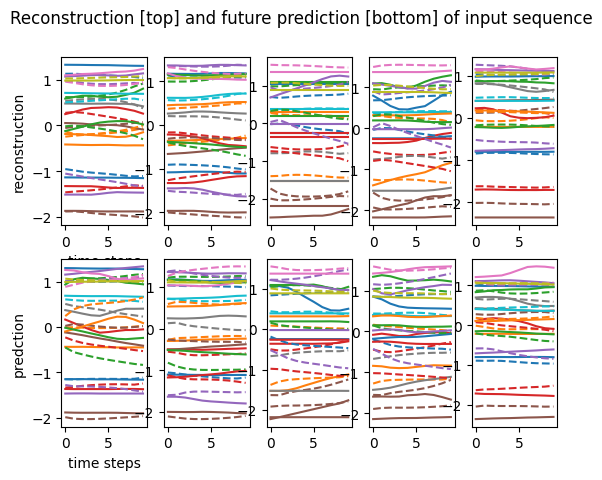

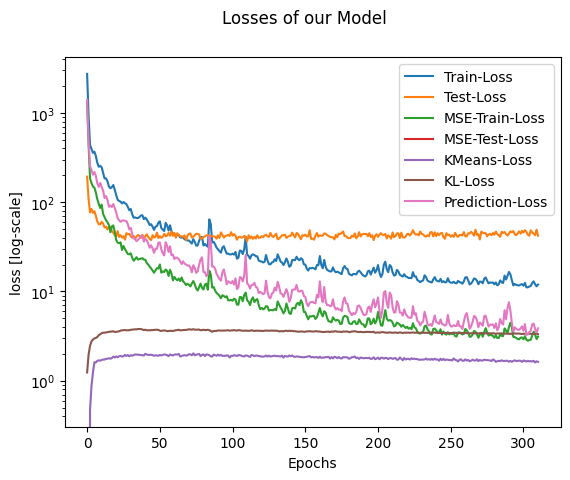

In [3]:
vame.evaluate_model(mp.vame_path/"config.yaml")

In [5]:
vame.pose_segmentation(mp.vame_path / "config.yaml")

Pose segmentation for VAME model: VAME 

Using CUDA
GPU active: True
GPU used: NVIDIA GeForce GTX 1070
Embedding of latent vector for file 0-02-20230913122407


100%|██████████| 188/188 [00:00<00:00, 617.45it/s]


Embedding of latent vector for file 0-19-20230913124517


100%|██████████| 113/113 [00:00<00:00, 580.94it/s]


Embedding of latent vector for file 0-14-20230913123906


100%|██████████| 177/177 [00:00<00:00, 611.92it/s]


Embedding of latent vector for file 0-02-20230913121608


100%|██████████| 165/165 [00:00<00:00, 491.75it/s]


Embedding of latent vector for file 0-13-20230913123820


100%|██████████| 186/186 [00:00<00:00, 529.15it/s]


Embedding of latent vector for file 0-12-20230913123759


100%|██████████| 171/171 [00:00<00:00, 525.55it/s]


For all animals the same parameterization of latent vectors is applied for 15 cluster
Using a HMM as parameterization!
/home/mateo/code/beehaviour/data/Your-VAME-Project-Jan5-2024/results/0-02-20230913122407/VAME/hmm-15/
/home/mateo/code/beehaviour/data/Your-VAME-Project-Jan5-2024/results/0-19-20230913124517/VAME/hmm-15/
/home/mateo/code/beehaviour/data/Your-VAME-Project-Jan5-2024/results/0-14-20230913123906/VAME/hmm-15/
/home/mateo/code/beehaviour/data/Your-VAME-Project-Jan5-2024/results/0-02-20230913121608/VAME/hmm-15/
/home/mateo/code/beehaviour/data/Your-VAME-Project-Jan5-2024/results/0-13-20230913123820/VAME/hmm-15/
/home/mateo/code/beehaviour/data/Your-VAME-Project-Jan5-2024/results/0-12-20230913123759/VAME/hmm-15/
You succesfully extracted motifs with VAME! From here, you can proceed running vame.motif_videos() 
